In [ ]:
!pip install pmdarima

In [ ]:
!pip install pyramid

In [ ]:
!pip3 install statsmodels

In [4]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#load dataset
AAPL = pd.read_csv("/content/drive/MyDrive/Datasets/AAPL.csv")
ALPH = pd.read_csv("/content/drive/MyDrive/Datasets/ALPH.csv")
AMZN = pd.read_csv("/content/drive/MyDrive/Datasets/AMZN.csv")
TSLA = pd.read_csv("/content/drive/MyDrive/Datasets/TSLA.csv")
MSFT = pd.read_csv("/content/drive/MyDrive/Datasets/MSFT.csv")

# Apple

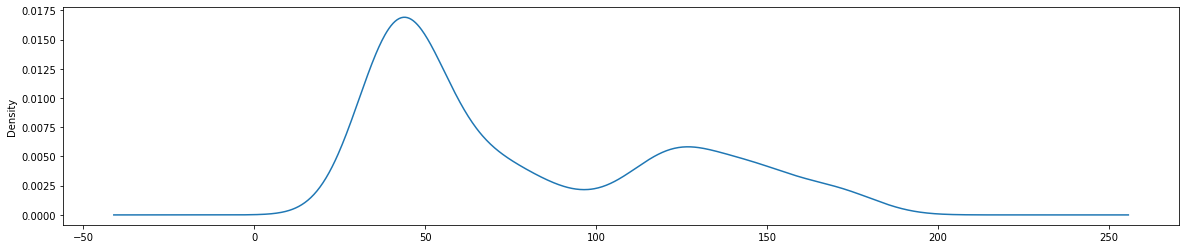

In [8]:
#Distribution of the dataset
plt.figure(figsize=(20, 4))
AAPL_close = AAPL['Adj Close']
AAPL_close.plot(kind='kde')

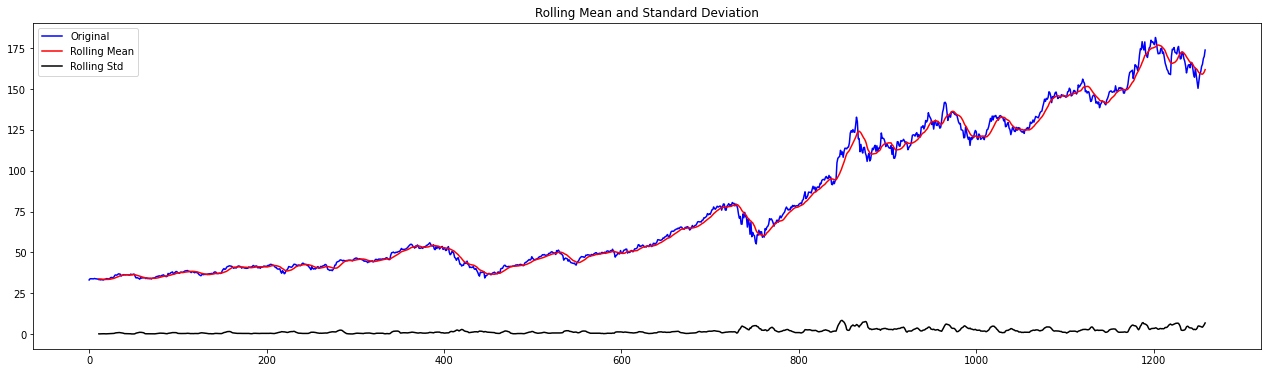

Results of dickey fuller test
Test Statistics                   0.646997
p-value                           0.988719
No. of lags used                 20.000000
Number of observations used    1238.000000
critical value (1%)              -3.435643
critical value (5%)              -2.863877
critical value (10%)             -2.568014
dtype: float64


In [9]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.figure(figsize=(22, 6))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(AAPL_close)

In [11]:
import statsmodels.api as smapi
train_data, test_data = AAPL[0:int(len(AAPL)*0.7)], AAPL[int(len(AAPL)*0.7):]
training_data = train_data['Adj Close'].values
test_data = test_data['Adj Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = smapi.tsa.arima.ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

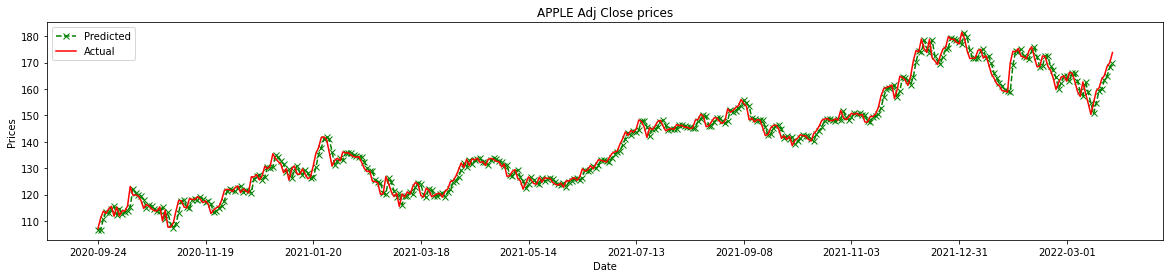

In [14]:
test_set_range = AAPL[int(len(AAPL)*0.7):].index
plt.figure(figsize=(20, 4))
plt.plot(test_set_range, model_predictions, color='green', marker='x', linestyle='dashed',label='Predicted')
plt.plot(test_set_range, test_data, color='red', label='Actual')
plt.title('APPLE Adj Close prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,40), AAPL.Date[881:1259:40])
plt.legend()
plt.show()

In [15]:
MSE_error = mean_squared_error(test_data, model_predictions)
rmse = math.sqrt(mean_squared_error(test_data, model_predictions))
mape = np.mean(np.abs(model_predictions - test_data)/np.abs(test_data))
print(f'MSE: {MSE_error}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MSE: 6.065441352539009
RMSE: 2.4628116762227292
MAPE: 0.013433393046469117


# Alphabet

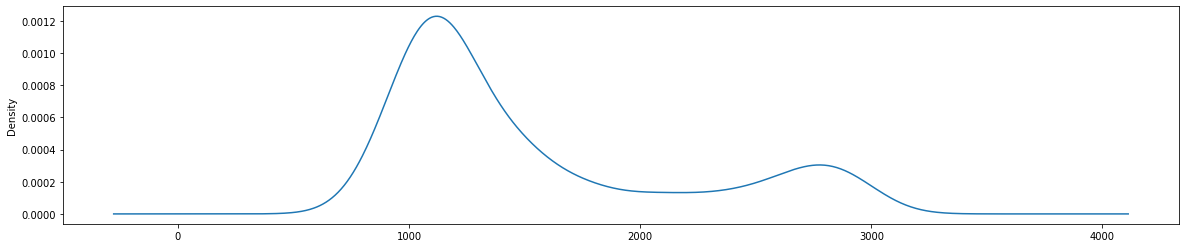

In [16]:
#Distribution of the dataset
plt.figure(figsize=(20, 4))
ALPH_close = ALPH['Adj Close']
ALPH_close.plot(kind='kde')

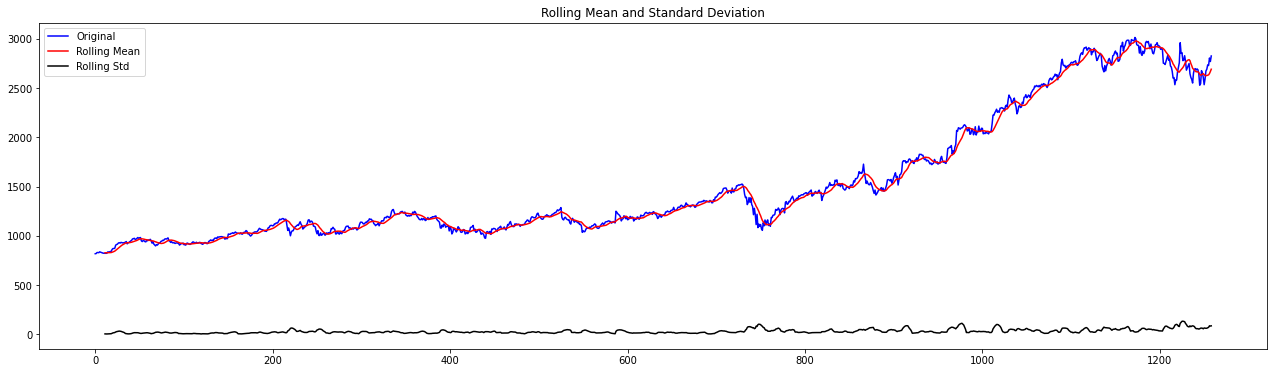

Results of dickey fuller test
Test Statistics                   0.578628
p-value                           0.987077
No. of lags used                 22.000000
Number of observations used    1236.000000
critical value (1%)              -3.435652
critical value (5%)              -2.863881
critical value (10%)             -2.568016
dtype: float64


In [17]:
#Test for staionarity
test_stationarity(ALPH_close)

In [18]:
import statsmodels.api as smapi
train_data, test_data = ALPH[0:int(len(ALPH)*0.7)], ALPH[int(len(ALPH)*0.7):]
training_data = train_data['Adj Close'].values
test_data = test_data['Adj Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = smapi.tsa.arima.ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

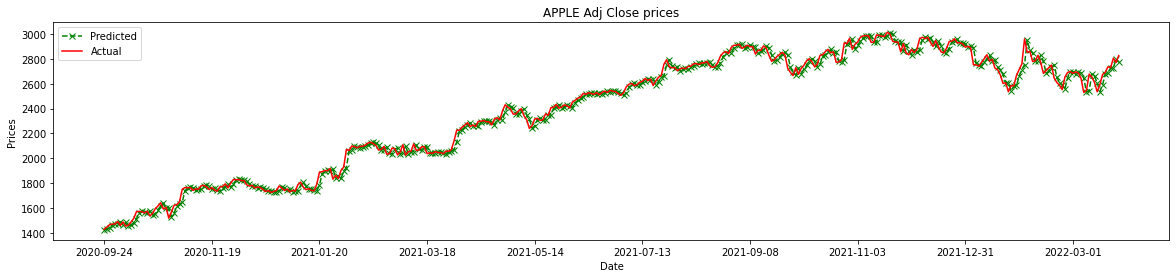

In [19]:
test_set_range = ALPH[int(len(ALPH)*0.7):].index
plt.figure(figsize=(20, 4))
plt.plot(test_set_range, model_predictions, color='green', marker='x', linestyle='dashed',label='Predicted')
plt.plot(test_set_range, test_data, color='red', label='Actual')
plt.title('APPLE Adj Close prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,40), ALPH.Date[881:1259:40])
plt.legend()
plt.show()

In [20]:
MSE_error = mean_squared_error(test_data, model_predictions)
rmse = math.sqrt(mean_squared_error(test_data, model_predictions))
mape = np.mean(np.abs(model_predictions - test_data)/np.abs(test_data))

print(f'MSE: {MSE_error}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MSE: 1593.8478602185742
RMSE: 39.923024186784424
MAPE: 0.012124635733403702


# Amazon

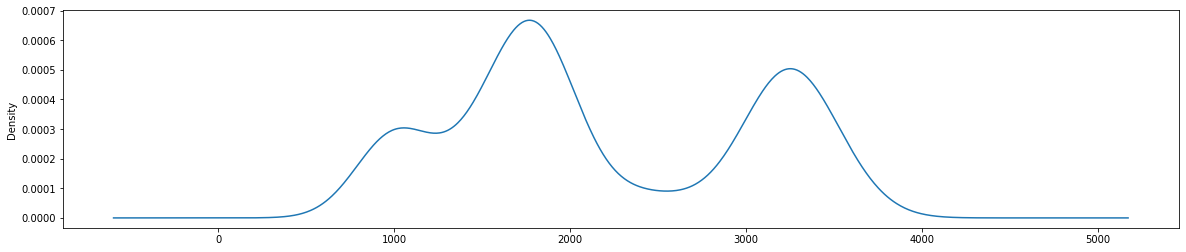

In [21]:
#Distribution of the dataset
plt.figure(figsize=(20, 4))
AMZN_close = AMZN['Adj Close']
AMZN_close.plot(kind='kde')

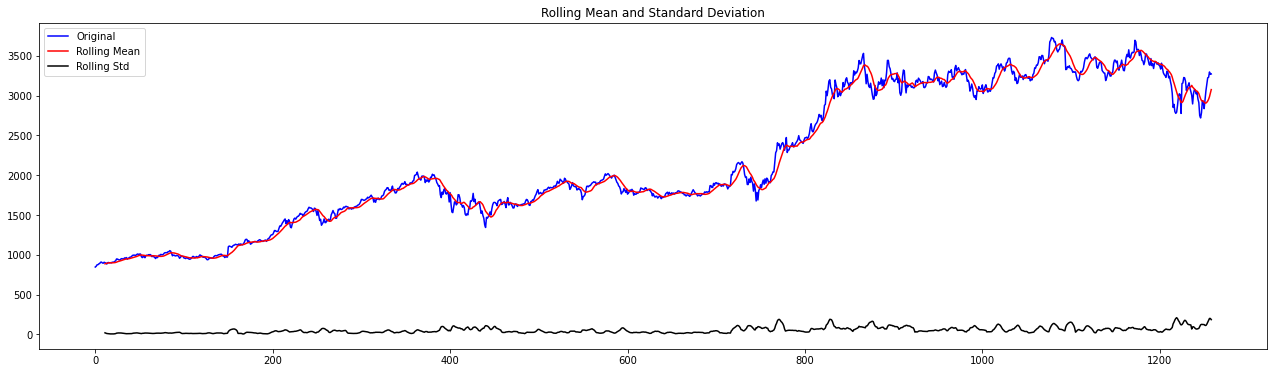

Results of dickey fuller test
Test Statistics                  -1.083806
p-value                           0.721486
No. of lags used                  3.000000
Number of observations used    1255.000000
critical value (1%)              -3.435571
critical value (5%)              -2.863846
critical value (10%)             -2.567998
dtype: float64


In [22]:
#Test for staionarity
test_stationarity(AMZN_close)

In [23]:
import statsmodels.api as smapi
train_data, test_data = AMZN[0:int(len(AMZN)*0.7)], AMZN[int(len(AMZN)*0.7):]
training_data = train_data['Adj Close'].values
test_data = test_data['Adj Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = smapi.tsa.arima.ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

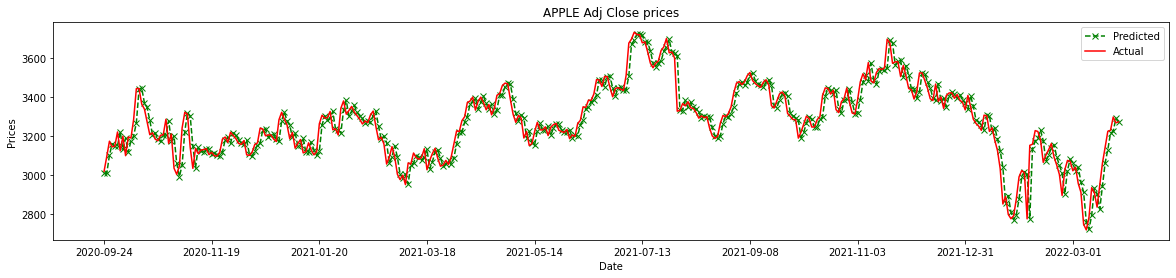

In [24]:
test_set_range = AMZN[int(len(AMZN)*0.7):].index
plt.figure(figsize=(20, 4))
plt.plot(test_set_range, model_predictions, color='green', marker='x', linestyle='dashed',label='Predicted')
plt.plot(test_set_range, test_data, color='red', label='Actual')
plt.title('APPLE Adj Close prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,40), AMZN.Date[881:1259:40])
plt.legend()
plt.show()

In [25]:
MSE_error = mean_squared_error(test_data, model_predictions)
rmse = math.sqrt(mean_squared_error(test_data, model_predictions))
mape = np.mean(np.abs(model_predictions - test_data)/np.abs(test_data))

print(f'MSE: {MSE_error}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MSE: 3817.413903676512
RMSE: 61.78522399147317
MAPE: 0.013807754138276897


# Tesla

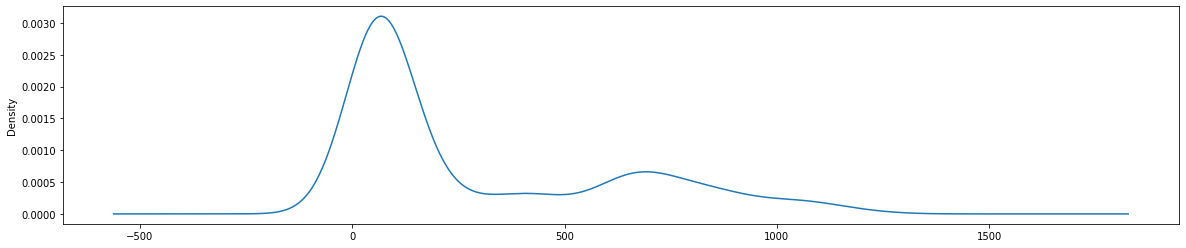

In [26]:
#Distribution of the dataset
plt.figure(figsize=(20, 4))
TSLA_close = TSLA['Adj Close']
TSLA_close.plot(kind='kde')

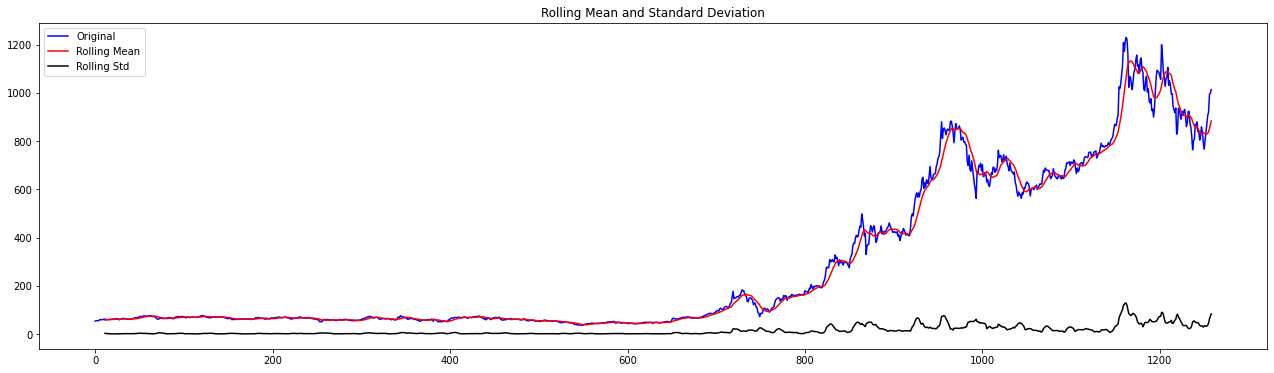

Results of dickey fuller test
Test Statistics                   0.285662
p-value                           0.976677
No. of lags used                 12.000000
Number of observations used    1246.000000
critical value (1%)              -3.435609
critical value (5%)              -2.863862
critical value (10%)             -2.568006
dtype: float64


In [27]:
#Test for staionarity
test_stationarity(TSLA_close)

In [28]:
import statsmodels.api as smapi
train_data, test_data = TSLA[0:int(len(TSLA)*0.7)], TSLA[int(len(TSLA)*0.7):]
training_data = train_data['Adj Close'].values
test_data = test_data['Adj Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = smapi.tsa.arima.ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

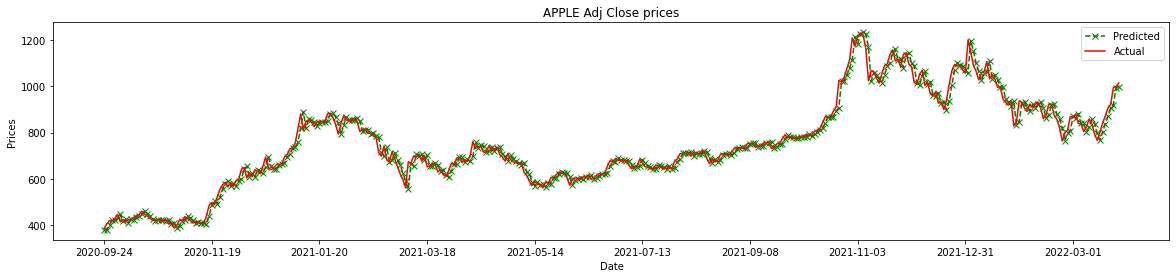

In [29]:
test_set_range = TSLA[int(len(TSLA)*0.7):].index
plt.figure(figsize=(20, 4))
plt.plot(test_set_range, model_predictions, color='green', marker='x', linestyle='dashed',label='Predicted')
plt.plot(test_set_range, test_data, color='red', label='Actual')
plt.title('APPLE Adj Close prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,40), TSLA.Date[881:1259:40])
plt.legend()
plt.show()

In [30]:
MSE_error = mean_squared_error(test_data, model_predictions)
rmse = math.sqrt(mean_squared_error(test_data, model_predictions))
mape = np.mean(np.abs(model_predictions - test_data)/np.abs(test_data))

print(f'MSE: {MSE_error}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MSE: 886.1128508102433
RMSE: 29.76764772047404
MAPE: 0.027202288664935077


# Microsoft

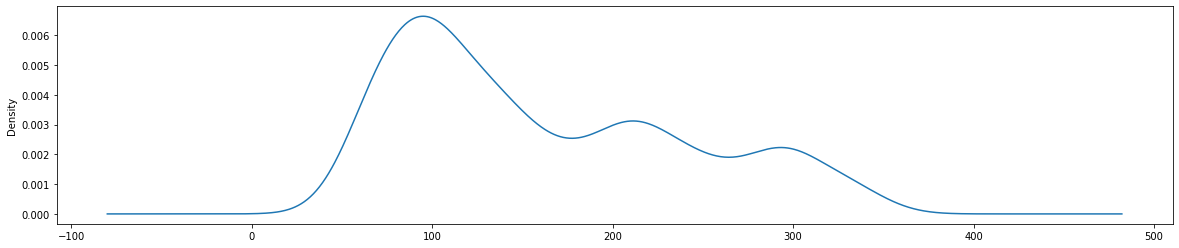

In [31]:
#Distribution of the dataset
plt.figure(figsize=(20, 4))
MSFT_close = MSFT['Adj Close']
MSFT_close.plot(kind='kde')

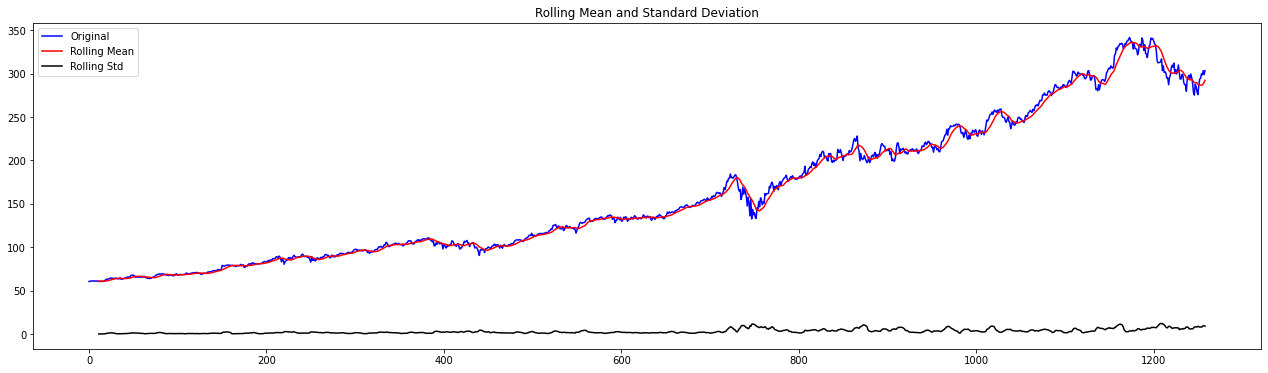

Results of dickey fuller test
Test Statistics                   0.105349
p-value                           0.966424
No. of lags used                 13.000000
Number of observations used    1245.000000
critical value (1%)              -3.435613
critical value (5%)              -2.863864
critical value (10%)             -2.568007
dtype: float64


In [32]:
#Test for staionarity
test_stationarity(MSFT_close)

In [33]:
import statsmodels.api as smapi
train_data, test_data = MSFT[0:int(len(MSFT)*0.7)], MSFT[int(len(MSFT)*0.7):]
training_data = train_data['Adj Close'].values
test_data = test_data['Adj Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = smapi.tsa.arima.ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

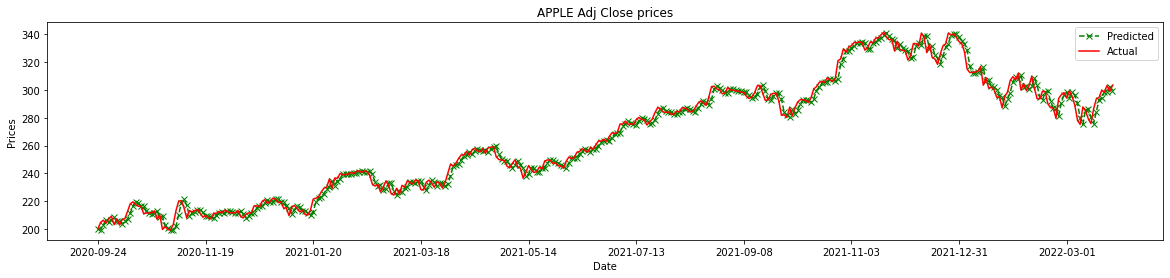

In [34]:
test_set_range = MSFT[int(len(MSFT)*0.7):].index
plt.figure(figsize=(20, 4))
plt.plot(test_set_range, model_predictions, color='green', marker='x', linestyle='dashed',label='Predicted')
plt.plot(test_set_range, test_data, color='red', label='Actual')
plt.title('APPLE Adj Close prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,40), MSFT.Date[881:1259:40])
plt.legend()
plt.show()

In [35]:
MSE_error = mean_squared_error(test_data, model_predictions)
rmse = math.sqrt(mean_squared_error(test_data, model_predictions))
mape = np.mean(np.abs(model_predictions - test_data)/np.abs(test_data))

print(f'MSE: {MSE_error}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MSE: 17.534346103714636
RMSE: 4.187403264997847
MAPE: 0.011866404700478528
